In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd
df=pd.read_csv('/content/SalesDaily (1).csv')

In [ ]:
df=df.tail(150)

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [ ]:
df.head()

,Date,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Weekday Name
1956,2019-05-12,4.67,1.680,3.10,38.8,2.0,1.0,19.000000,5.0,2019,5,Sunday
1957,2019-05-13,5.00,4.527,2.00,26.2,11.0,0.0,11.000000,3.0,2019,5,Monday
1958,2019-05-14,6.67,4.363,4.00,25.0,5.0,0.0,11.000000,3.0,2019,5,Tuesday
1959,2019-05-15,4.00,1.066,4.15,28.4,7.0,0.0,5.000000,3.0,2019,5,Wednesday
1960,2019-05-16,5.00,1.067,2.00,12.0,9.0,1.0,16.291667,5.0,2019,5,Thursday


In [ ]:
ts_data_edit = df[['Date','M01AB']]

In [ ]:
ts_data_edit.rename(columns= {'Date':'ds','M01AB':'y'}, inplace=True)

/tmp/ipython-input-2202483421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_data_edit.rename(columns= {'Date':'ds','M01AB':'y'}, inplace=True)


In [ ]:
model = Prophet()
model.fit(ts_data_edit)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Make future prediction
future = model.make_future_dataframe(periods = 30)
forecast = model.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-12,5.363208,1.750618,8.455939,5.363208,5.363208,-0.127912,-0.127912,-0.127912,-0.127912,-0.127912,-0.127912,0.0,0.0,0.0,5.235296
1,2019-05-13,5.365418,1.441933,8.163850,5.365418,5.365418,-0.494687,-0.494687,-0.494687,-0.494687,-0.494687,-0.494687,0.0,0.0,0.0,4.870731
2,2019-05-14,5.367628,2.273814,9.195151,5.367628,5.367628,0.176660,0.176660,0.176660,0.176660,0.176660,0.176660,0.0,0.0,0.0,5.544288
3,2019-05-15,5.369837,1.402303,8.152897,5.369837,5.369837,-0.665322,-0.665322,-0.665322,-0.665322,-0.665322,-0.665322,0.0,0.0,0.0,4.704515
4,2019-05-16,5.372047,2.376548,8.997284,5.372047,5.372047,0.448991,0.448991,0.448991,0.448991,0.448991,0.448991,0.0,0.0,0.0,5.821038


In [ ]:
forecastEdit = forecast[['ds','yhat']]
forecastEdit.to_excel('forecast.xlsx')

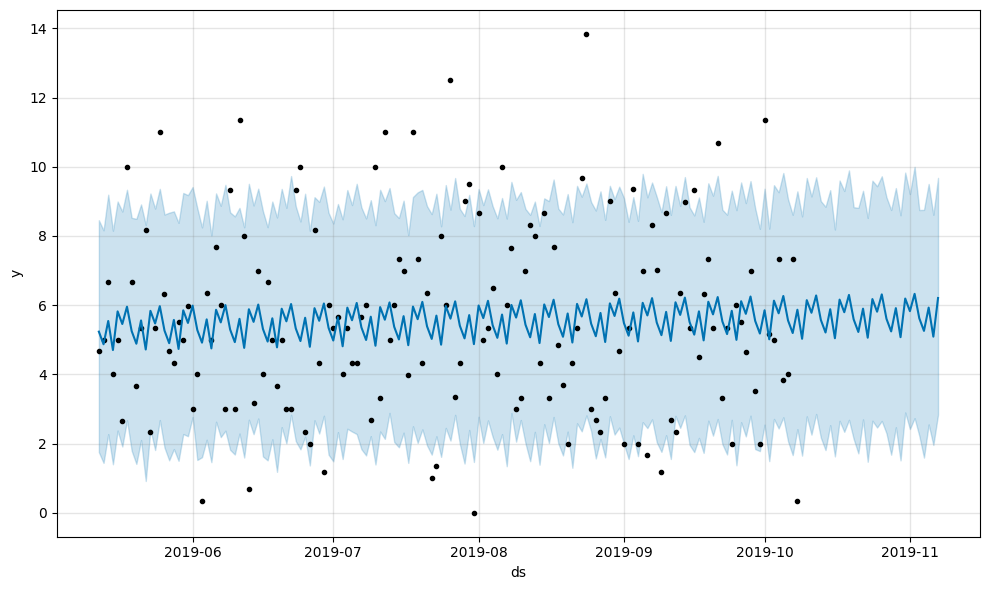

In [ ]:
#Visualize the format
#from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
#Create a model forcast model
fig = model.plot(forecast)

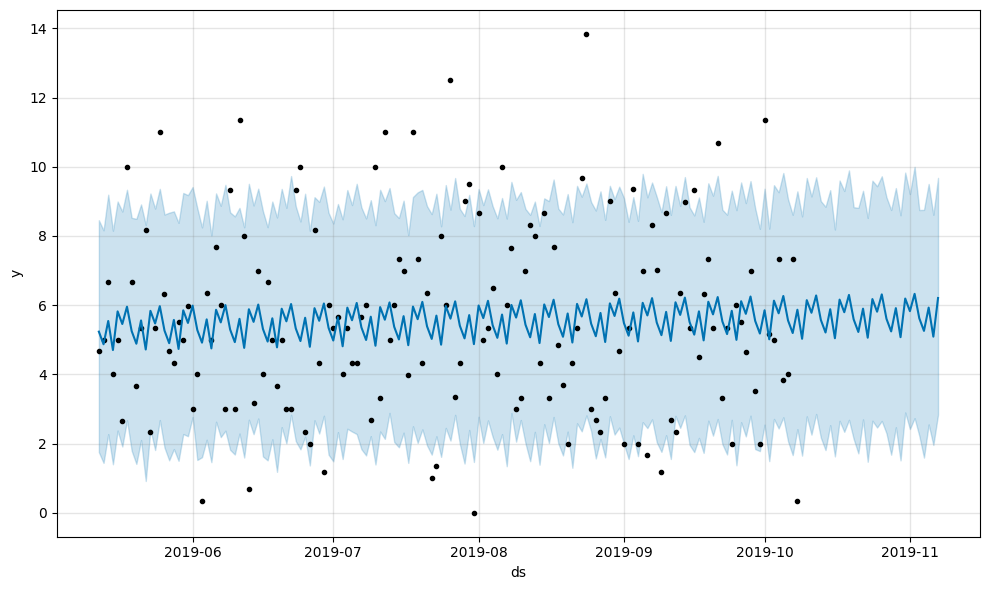

In [ ]:
fig = model.plot(forecast)
fig.savefig("forecast.png",format="png")

In [ ]:
import yfinance as yf

#1.Fetch NSE stock data(RELIANCE)
ticker = yf.Ticker("RELIANCE.NS")
df=ticker.history(period="1y")

In [ ]:
tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS", "SUNPHARMA.BO"]
df_multiple = yf.download(tickers, period="1yr")
df_multiple.head()

/tmp/ipython-input-722983410.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multiple = yf.download(tickers, period="1yr")
[*********************100%***********************]  4 of 4 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['RELIANCE.NS']: YFInvalidPeriodError("RELIANCE.NS: Period '1yr' is invalid, must be one of: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max")
ERROR:yfinance:['TCS.NS']: YFInvalidPeriodError("TCS.NS: Period '1yr' is invalid, must be one of: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max")
ERROR:yfinance:['SUNPHARMA.BO']: YFInvalidPeriodError("SUNPHARMA.BO: Period '1yr' is invalid, must be one of: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max")
ERROR:yfinance:['INFY.NS']: YFInvalidPeriodError("INFY.NS: Period '1yr' is invalid, must be one of: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max")


Empty DataFrame
Columns: [(Adj Close, INFY.NS), (Adj Close, RELIANCE.NS), (Adj Close, SUNPHARMA.BO), (Adj Close, TCS.NS), (Close, INFY.NS), (Close, RELIANCE.NS), (Close, SUNPHARMA.BO), (Close, TCS.NS), (High, INFY.NS), (High, RELIANCE.NS), (High, SUNPHARMA.BO), (High, TCS.NS), (Low, INFY.NS), (Low, RELIANCE.NS), (Low, SUNPHARMA.BO), (Low, TCS.NS), (Open, INFY.NS), (Open, RELIANCE.NS), (Open, SUNPHARMA.BO), (Open, TCS.NS), (Volume, INFY.NS), (Volume, RELIANCE.NS), (Volume, SUNPHARMA.BO), (Volume, TCS.NS)]
Index: []

In [ ]:
#2. Prepare Data for Prophet

df_reset = df.reset_index()[["Date","Close"]]

#Remove Timezone
df_reset["Date"] = df_reset["Date"].dt.tz_localize(None)
df_reset.columns = ["ds", "y"]   #Prophet requires 'ds' and 'y'
print(df_reset.head())

          ds            y
0 2024-12-05  1316.790894
1 2024-12-06  1306.332642
2 2024-12-09  1289.997925
3 2024-12-10  1279.738770
4 2024-12-11  1273.115234


In [ ]:
#3. Build Prophet Model
model = Prophet()
model.fit(df_reset)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         yhat   yhat_lower   yhat_upper
255 2025-12-11  1579.011585  1544.358107  1617.759982
256 2025-12-12  1580.003412  1540.140426  1620.184891
257 2025-12-13  1604.188281  1562.450985  1643.590148
258 2025-12-14  1614.395841  1573.692573  1652.091537
259 2025-12-15  1586.509232  1545.835257  1629.729318


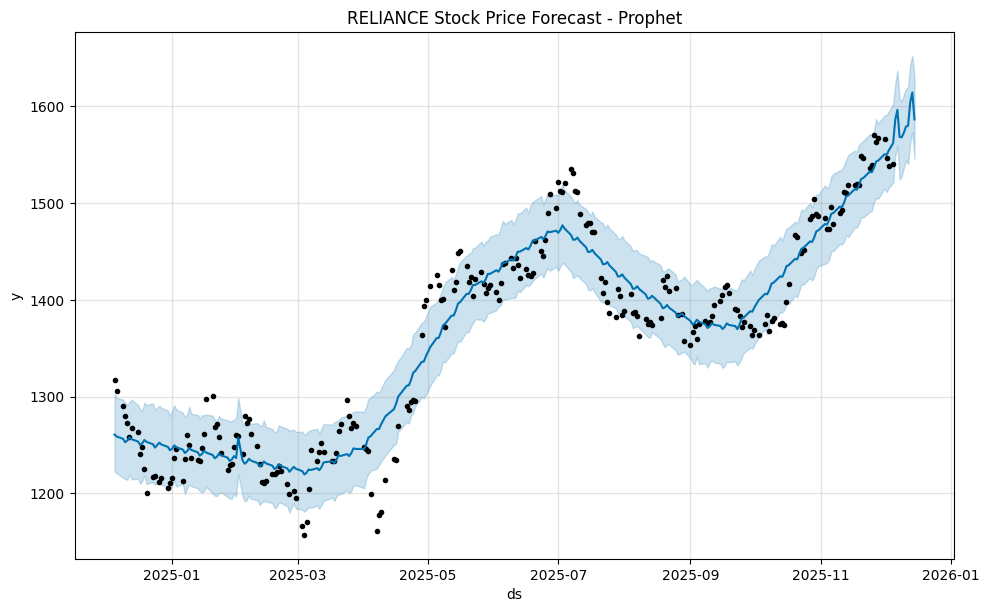

In [ ]:
##4. Create Future Dates (next 30 days)
future = model.make_future_dataframe(periods=10)

##5. Generate Forecast
forecast = model.predict(future)

print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail())

model.plot(forecast)
plt.title("RELIANCE Stock Price Forecast - Prophet")
plt.show()

In [ ]:
!pip install streamlit pyngrok yfinance prophet plotly pandas numpy


In [ ]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import plotly.graph_objects as go
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Page Configuration
st.set_page_config(
    page_title="NSE Stock Price Predictor",
    page_icon="📈",
    layout="wide"
)

# Custom CSS for styling
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        font-weight: bold;
        color: #1E88E5;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 20px;
        border-radius: 10px;
    }
    .stButton>button {
        background-color: #FF6B6B;
        color: white;
        border-radius: 10px;
        padding: 10px 20px;
        font-weight: bold;
    }
</style>
""", unsafe_allow_html=True)

# Sidebar - Input Parameters
st.sidebar.header("Input Parameters")
st.sidebar.markdown("---")

ticker_symbol = st.sidebar.text_input(
    "Enter NSE Ticker Symbol",
    value="INFY",
    help="Enter the NSE ticker symbol (e.g., INFY, RELIANCE, TCS)"
)

forecast_days = st.sidebar.slider(
    "Forecast Period (days)",
    min_value=7,
    max_value=90,
    value=30,
    help="Select the number of days to forecast"
)

model_choice = st.sidebar.selectbox(
    "Select Forecasting Model",
    ["Prophet", "ARIMA", "LSTM"],
    help="Choose the forecasting model"
)

analyze_button = st.sidebar.button("🔮 Analyze & Forecast")

st.markdown('<p class="main-header">📈 NSE Stock Price Predictor</p>', unsafe_allow_html=True)
st.markdown("Enter an NSE company ticker to analyze historical data and forecast future prices")
st.markdown("---")

popular_stocks = pd.DataFrame({
    'Company': ['Reliance Industries', 'TCS', 'Infosys', 'HDFC Bank', 'ICICI Bank',
                'Bharti Airtel', 'ITC', 'State Bank of India'],
    'Ticker': ['RELIANCE', 'TCS', 'INFY', 'HDFCBANK', 'ICICIBANK',
               'BHARTIARTL', 'ITC', 'SBIN']
})

@st.cache_data(ttl=3600)
def fetch_stock_data(ticker, period="1y"):
    try:
        stock = yf.Ticker(f"{ticker}.NS")
        df = stock.history(period=period)
        info = stock.info
        return df, info
    except Exception as e:
        st.error(f"Error fetching data: {e}")
        return None, None

def prophet_forecast(df, periods):
    prophet_df = df.reset_index()[['Date', 'Close']].copy()
    prophet_df.columns = ['ds', 'y']
    prophet_df['ds'] = pd.to_datetime(prophet_df['ds']).dt.tz_localize(None)
    model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast, prophet_df

if analyze_button:
    with st.spinner(f"Fetching data for {ticker_symbol}..."):
        df, info = fetch_stock_data(ticker_symbol)
    if df is not None and len(df) > 0:
        company_name = info.get('longName', ticker_symbol)
        st.success(f"✅ Analysis complete for {company_name}")
        col1, col2, col3, col4 = st.columns(4)
        current_price = df['Close'].iloc[-1]
        prev_price = df['Close'].iloc[-2]
        price_change = ((current_price - prev_price) / prev_price) * 100
        with col1:
            st.metric(label="Current Price", value=f"₹{current_price:.2f}", delta=f"{price_change:.2f}%")
        with col2:
            st.metric(label="52W High", value=f"₹{df['High'].max():.2f}")
        with col3:
            st.metric(label="52W Low", value=f"₹{df['Low'].min():.2f}")
        with col4:
            avg_volume = df['Volume'].mean()
            st.metric(label="Avg Volume", value=f"{avg_volume/1e6:.2f}M")
        st.markdown("---")
        st.subheader("📊 Price Forecast")
        with st.spinner("Running Prophet forecast..."):
            forecast, prophet_df = prophet_forecast(df, forecast_days)
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=prophet_df['ds'], y=prophet_df['y'], mode='lines', name='Historical Price', line=dict(color='#1E88E5', width=2)))
        forecast_data = forecast[forecast['ds'] > prophet_df['ds'].max()]
        fig.add_trace(go.Scatter(x=forecast_data['ds'], y=forecast_data['yhat'], mode='lines', name='Forecast', line=dict(color='#FF6B6B', width=2, dash='dash')))
        fig.add_trace(go.Scatter(x=pd.concat([forecast_data['ds'], forecast_data['ds'][::-1]]), y=pd.concat([forecast_data['yhat_upper'], forecast_data['yhat_lower'][::-1]]), fill='toself', fillcolor='rgba(255,107,107,0.2)', line=dict(color='rgba(255,255,255,0)'), name='Confidence Interval'))
        fig.update_layout(title=f"{company_name} - Historical & Forecast", xaxis_title="Date", yaxis_title="Price (₹)", hovermode='x unified', template='plotly_white', height=500)
        st.plotly_chart(fig, use_container_width=True)
        st.subheader("📋 Forecast Details")
        forecast_display = forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
        forecast_display.columns = ['Date', 'Predicted Price', 'Lower Bound', 'Upper Bound']
        forecast_display['Date'] = forecast_display['Date'].dt.strftime('%Y-%m-%d')
        forecast_display = forecast_display.round(2)
        st.dataframe(forecast_display.head(10), use_container_width=True)
    else:
        st.error(f" Could not fetch data for {ticker_symbol}. Please check the ticker symbol.")
else:
    st.info(" Enter an NSE ticker symbol in the sidebar and click 'Analyze & Forecast' to begin")
    st.subheader("Popular NSE Stocks:")
    st.dataframe(popular_stocks, use_container_width=True, hide_index=False)


Writing app.py


In [ ]:
from pyngrok import ngrok
import subprocess
import time

#  Set your authtoken
ngrok.set_auth_token("35N41ciJDK0MiV7wytM8YzVQ2k2_GnhuDucBGo1JvaMhWM2F")

#  Kill any existing ngrok tunnels
ngrok.kill()

#  Start Streamlit app in background (VS Code compatible)
process = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", "8501"],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
)

#  Wait for Streamlit to start
time.sleep(3)

#  Create public URL
public_url = ngrok.connect(8501)
print(f" Your dashboard is live at: {public_url}")